Do your work for this exercise in a file named model.

Take the work we did in the lessons further:

What other types of models (i.e. different classifcation algorithms) could you use?

 * Neural Networks, Naive Bayes, CRF conditional random field
 
How do the models compare when trained on term frequency data alone, instead of TF-IDF values?

TF is term frequency to let you know how often a word appears in a document

IDF is inverse document frequency to measure how many documents will a word appear in 

TF-IDf is combination of two measure above

In [21]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from env import get_connection
from prepare import clean, lemmatize

In [2]:
url = get_connection('spam_db')

query = 'SELECT * FROM spam'

df = pd.read_sql(query, url, index_col='id')

df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['clean_text'] = df.text.apply(clean, args=['us']) # .apply is the function to each entry of df
df.head() #lemmatizing it 

,label,text,clean_text
id,,,
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah ' think goes usf lives around though


In [5]:
X = df.clean_text
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    random_state=31)

In [6]:
baseline_acc = y_train.value_counts().max()/y_train.shape[0]*100
print(f'Behold, the might baseline accuracy: {round(baseline_acc, 2)}')

Behold, the might baseline accuracy: 86.51


Inverse Document frequency provides info about individual words using multiple documents 

In [17]:
# we can calculate the inverse document frequency metric for each words
document = df.clean_text.str
words = document.split()

In [18]:
# From the Series we can extract the value_counts, which is our raw count
# for term frequency. Once we have the raw counts, we can calculate the
# other measures.
(pd.DataFrame({'raw_count': words.value_counts()})
 .assign(frequency=lambda document: document.raw_count / document.raw_count.sum())
 .assign(augmented_frequency=lambda document: document.frequency / document.frequency.max()))

,raw_count,frequency,augmented_frequency
"[sorry, ', call, later]",30,0.005384,1.000000
[ok],20,0.003589,0.666667
"[cant, pick, phone, right, pls, send, message]",12,0.002154,0.400000
[okie],7,0.001256,0.233333
[],7,0.001256,0.233333
...,...,...,...
"[ok, knackered, came, home, went, sleep, good, full, time, work, lark]",1,0.000179,0.033333
"[gotta, collect, da, car, 6, lei]",1,0.000179,0.033333
"[way, home, long, dry, spell, season, would]",1,0.000179,0.033333
"[urgent, please, call, 09061743811, landline, abta, complimentary, 4, tenerife, holiday, a5000, cash, await, collection, sae, tcs, box, 326, cw25wx, 150ppm]",1,0.000179,0.033333


Text(0.5, 1.0, 'IDF for a given word')

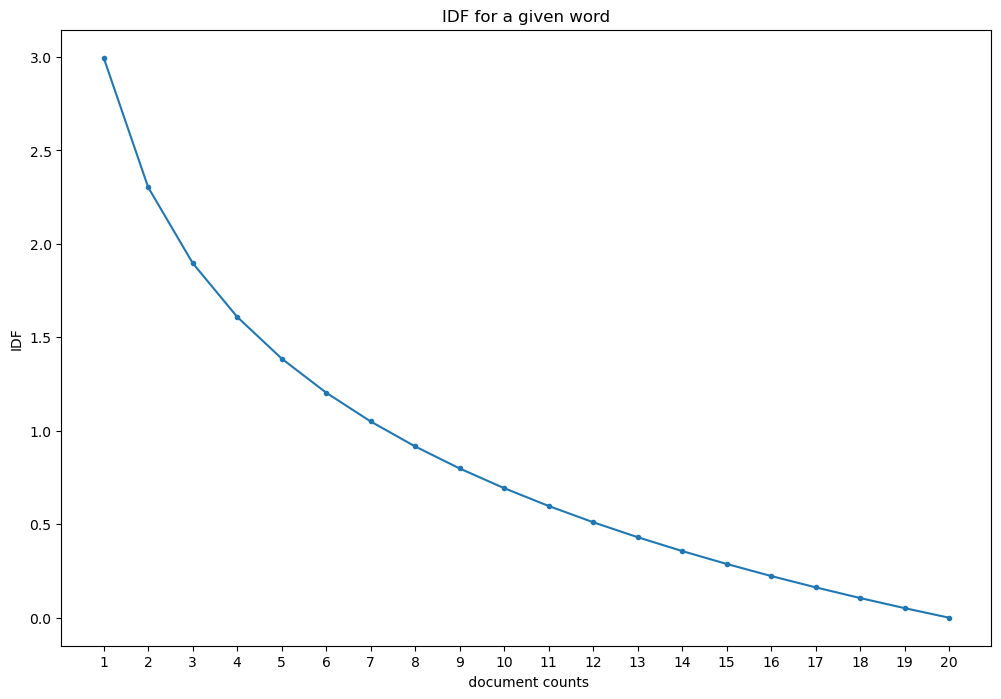

In [25]:
n_documents= 20
x = np.arange(1, n_documents+1)
y = np.log(n_documents/x)

plt.figure(figsize =(12, 8))
plt.plot(x,y,marker='.')

plt.xticks(x)
plt.xlabel(' document counts')
plt.ylabel('IDF')
plt.title('IDF for a given word')

In [54]:
from pprint import pprint


In [56]:
# calculating IDF for multiple words


documents = {topic: lemmatize(basic_clean(documents[topic])) for topic in documents}
pprint(documents)

/var/folders/mn/mp1xhgm522gc5vhffb_k61d00000gn/T/ipykernel_56607/1612725496.py:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  documents = {topic: lemmatize(basic_clean(documents[topic])) for topic in documents}


NameError: name 'basic_clean' is not defined